In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

plt.rcParams['lines.markersize'] = 2
plt.rcParams['axes.labelpad'] = 1.5
cbtextsize = 7

%matplotlib inline

In [2]:
ex_offset = 1


h = np.linspace(-0.8, 0.8, 21)
k = np.linspace(-1.2, 1.2, 23)

e_m_h = np.linspace(-0.05, 0.25, 21)
e_m_k = np.linspace(-0.05, 0.25, 29)
e_e_h = np.linspace(-0.05, 0.25, 21) + ex_offset
e_e_k = np.linspace(-0.05, 0.25, 29) + ex_offset

_, E = np.meshgrid(h, e_m_h)
energy_m_h = 0.1*np.exp(-2*h**2) + 0.01*np.random.rand(h.size)
I_m_h = np.exp(-(E - energy_m_h)**2/.01)

_, E = np.meshgrid(k, e_m_k)
energy_m_k = 0.1*np.cos(np.pi*k/2)**2 + 0.01*np.random.rand(k.size)
I_m_k = np.exp(-(E - energy_m_k)**2/.01)

_, E = np.meshgrid(h, e_e_h)
energy_e_h = 0.1*np.exp(-2*h**2) + 0.01*np.random.rand(h.size) + ex_offset
I_e_h = 4*np.exp(-(E - energy_e_h)**2/.01)

_, E = np.meshgrid(k, e_e_k)
energy_e_k = 0.1*np.cos(np.pi*k/2)**2 + 0.01*np.random.rand(k.size) + ex_offset
I_e_k = 4*np.exp(-(E - energy_e_k)**2/.01)

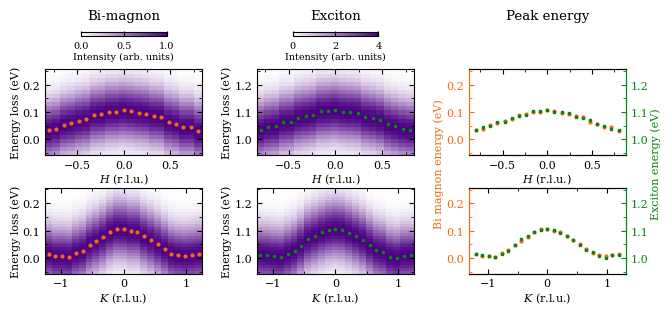

In [3]:
fig, axs = plt.subplots(3, 3, figsize=(6 + 3/4, 3.), height_ratios=[0.1, 1, 1])

colors = ["white", "indigo"]
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

color0 = '#F96815' #'darkorange'
color1 = '#028A0F' # darkgreen'

fraction = 0.5
aspect = 20
shrink = 0.7

vmin0 = 0
vmax0 = 1
art = axs[1, 0].pcolor(h, e_m_h, I_m_h, vmin=vmin0, vmax=vmax0, cmap=cmap,
                       linewidth=0,rasterized=True)
axs[1, 0].plot(h, energy_m_h, 'o', color=color0)
axs[2, 0].pcolor(k, e_m_k, I_m_k, vmin=vmin0, vmax=vmax0, cmap=cmap,
                 linewidth=0,rasterized=True)
axs[2, 0].plot(k, energy_m_k, 'o', color=color0)

cb = plt.colorbar(art, ax=axs[0, 0],
                  fraction=fraction, aspect=aspect,
                  orientation='horizontal')
cb.set_label('Intensity (arb. units)', size=cbtextsize)
cb.ax.tick_params(labelsize=cbtextsize)

vmin1 = 0
vmax1 = 4
art = axs[1, 1].pcolor(h, e_e_h, I_e_h, vmin=vmin1, vmax=vmax1, cmap=cmap,
                      linewidth=0,rasterized=True)
axs[1, 1].plot(h, energy_e_h, 's', color=color1)
axs[2, 1].pcolor(k, e_e_k, I_e_k, vmin=vmin1, vmax=vmax1, cmap=cmap,
                 linewidth=0,rasterized=True)
axs[2, 1].plot(k, energy_e_k, 's', color=color1)

cb = plt.colorbar(art, ax=axs[0, 1],
                  fraction=fraction, aspect=aspect,
                  orientation='horizontal',
                  label='Intensity (arb. units)')
cb.set_label('Intensity (arb. units)', size=cbtextsize)
cb.ax.tick_params(labelsize=cbtextsize)

axrs = [None, None]

axs[1, 2].plot(h, energy_m_h, 'o', color=color0)
axrs[0] = axs[1, 2].twinx()
axrs[0].plot(h, energy_e_h, 's', color=color1)
ymin, ymax = axs[1, 0].get_ylim()
axs[1, 2].set_ylim(ymin=ymin, ymax=ymax)
axrs[0].set_ylim(ymin=ymin + ex_offset, ymax=ymax + ex_offset)

axs[2, 2].plot(k, energy_m_k, 'o', color=color0)
axrs[1] = axs[2, 2].twinx()
axrs[1].plot(k, energy_e_k, 's', color=color1)
axs[2, 2].set_ylim(ymin=ymin, ymax=ymax)
axrs[1].set_ylim(ymin=ymin + ex_offset, ymax=ymax + ex_offset)

axs[0, 2].remove()
axs[0, 0].set_visible(False)
axs[0, 1].set_visible(False)

for ax in axs[1:].ravel():
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

for ax in axs[1:3, :2].ravel():
    ax.set_ylabel('Energy loss (eV)')

for ax in axs[1:, 2]:
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.tick_params(axis='y', which='both', colors=color0)
    ax.spines['left'].set_color(color0)
    ax.spines['right'].set_color(color1)
    
for ax in axrs:
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.tick_params(axis='y', which='both', colors=color1)
    ax.spines['left'].set_color(color0)
    ax.spines['right'].set_color(color1)

axs[1,2].set_ylabel('Bi magnon energy (eV)', color=color0)
l = axs[1, 2].yaxis.get_label()
loc = l.get_position()
l.set_position((loc[0], -.1))

axrs[0].set_ylabel('Exciton energy (eV)', color=color1,
                    position=(loc[0], -loc[1]))
l = axrs[0].yaxis.get_label()
loc = l.get_position()
l.set_position((loc[0], -.1))

axs[1, 2].spines['left'].set_color('yellow')
axs[1, 2].spines['top'].set_color('red')

for ax in axs[1, :]:
    ax.set_xlabel('$H$ (r.l.u.)')
    
for ax in axs[2, :]:
    ax.set_xlabel('$K$ (r.l.u.)')
    
for ax, t in zip(axs[1, :], ['Bi-magnon', 'Exciton', 'Peak energy']):
    ax.set_title(t, pad=36)

for ax in list(axs[1:, :].ravel()) + axrs:
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

fig.subplots_adjust(left=0.06, right=0.92, bottom=0.1, top=.92, hspace=.55, wspace=.35)
fig.savefig('ex_26_dispersions.pdf', dpi=1200)